In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import plotly.express as px

In [54]:
df = pd.read_csv("../data_cleaned1.csv")
df

,post_id,post_text,time,comments,shares,reactions,reaction_count,thích,thương thương,yêu thích,haha,buồn,wow,phẫn nộ
0,649244514087261,Cùng VBA xem lại những hình ảnh đẹp mắt từ trậ...,2023-11-21 19:30:07,7,14,"{'thích': 463, 'yêu thích': 104, 'wow': 1, 'th...",569,463,1,104,0,0,1,0
1,648554887489557,𝐇𝐀𝐏𝐏𝐘 𝐓𝐄𝐀𝐂𝐇𝐄𝐑'𝐒 𝐃𝐀𝐘 𝟐𝟎.𝟏𝟏 👥❤️\n\nNhân dịp Ngày...,2023-11-20 12:12:33,0,0,"{'thích': 64, 'yêu thích': 26}",90,64,0,26,0,0,0,0
2,648528070825572,🔥GIẢM BUNG NÓC TOÀN BỘ SP TỚI 50%++ BLACK FRID...,2023-11-20 11:00:09,0,0,"{'thích': 10, 'yêu thích': 2}",12,10,0,2,0,0,0,0
3,648160930862286,BẮT ĐẦU THÔI!!!\n\nALL-STARS BALL OUT ❤️‍🔥🏀\n\...,2023-11-19 19:18:13,10,12,"{'thích': 660, 'yêu thích': 162, 'haha': 3, 'w...",832,660,2,162,3,0,5,0
4,648080580870321,5 rapper Rap Việt và 1 rapper bí mật đã sẵn sà...,2023-11-19 15:52:32,5,1,"{'thích': 387, 'yêu thích': 67, 'wow': 4}",458,387,0,67,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2067931790058994,🏆 𝐕𝐁𝐀 𝐁𝐫𝐨𝐮𝐠𝐡𝐭 𝐛𝐲 𝐍𝐨𝐯𝐚𝐖𝐨𝐫𝐥𝐝 𝟐𝟎𝟐𝟐 cùng 7 đội bón...,2022-08-20 15:09:19,1,2,"{'thích': 226, 'yêu thích': 35, 'thương thương...",262,226,1,35,0,0,0,0
136,2113733948812111,"𝐕𝐁𝐀 𝐛𝐫𝐨𝐮𝐠𝐡𝐭 𝐛𝐲 𝐍𝐨𝐯𝐚𝐖𝐨𝐫𝐥𝐝 𝟐𝟎𝟐𝟐 - 𝐏𝐥𝐚𝐲𝐨𝐟𝐟𝐬\n\n""T...",2022-08-20 15:08:56,1,1,"{'thích': 99, 'yêu thích': 27, 'wow': 1, 'thươ...",128,99,1,27,0,0,1,0
137,2112032122315627,"NÂNG CAO THỂ LỰC, CHINH CHIẾN HẾT MÌNH\n\nĐể c...",2022-08-18 12:05:11,0,0,{'like': 38},38,0,0,0,0,0,0,0
138,2107354116116761,NÓI KHÔNG VỚI PHÂN BIỆT CHỦNG TỘC ❌\n═════════...,2022-08-12 11:44:49,0,2,"{'thích': 230, 'yêu thích': 111, 'thương thươn...",345,230,4,111,0,0,0,0


In [55]:
df_cmt = pd.read_csv("../VBA.vncomments.csv")

In [56]:
df_cmt

,Unnamed: 0,post_id,post_text,comments_text
0,0,649244514087261,Cùng VBA xem lại những hình ảnh đẹp mắt từ trậ...,"['có vid hong ad', 'Thùy Dung đã nói từ thiện ..."
1,1,648554887489557,𝐇𝐀𝐏𝐏𝐘 𝐓𝐄𝐀𝐂𝐇𝐄𝐑'𝐒 𝐃𝐀𝐘 𝟐𝟎.𝟏𝟏 👥❤️\n\nNhân dịp Ngày...,[]
2,2,648528070825572,🔥GIẢM BUNG NÓC TOÀN BỘ SP TỚI 50%++ BLACK FRID...,[]
3,3,648160930862286,BẮT ĐẦU THÔI!!!\n\nALL-STARS BALL OUT ❤️‍🔥🏀\n\...,['All star vba sao ko phai là những star thật ...
4,4,648080580870321,5 rapper Rap Việt và 1 rapper bí mật đã sẵn sà...,"['Do mình đi 2 người mà có 1 vé,\nMình muốn pa..."
...,...,...,...,...
192,192,611533704525009,NaN,[]
193,193,611324614545918,VBA AWARDS 2023 - NƠI VINH DANH NHỮNG CÁ NHÂN ...,[]
194,194,610861514592228,VBA FINALS 2023 🏆\n\n——————\nĐẶT VÉ NGAY TẠI: ...,['Ai còn vé hạng Standard không ạ 😞 pass mình ...
195,195,610858464592533,🏀Các ballers U22 hãy nhanh tay để được nhận ưu...,[]


In [57]:
df

,post_id,post_text,time,comments,shares,reactions,reaction_count,thích,thương thương,yêu thích,haha,buồn,wow,phẫn nộ
0,649244514087261,Cùng VBA xem lại những hình ảnh đẹp mắt từ trậ...,2023-11-21 19:30:07,7,14,"{'thích': 463, 'yêu thích': 104, 'wow': 1, 'th...",569,463,1,104,0,0,1,0
1,648554887489557,𝐇𝐀𝐏𝐏𝐘 𝐓𝐄𝐀𝐂𝐇𝐄𝐑'𝐒 𝐃𝐀𝐘 𝟐𝟎.𝟏𝟏 👥❤️\n\nNhân dịp Ngày...,2023-11-20 12:12:33,0,0,"{'thích': 64, 'yêu thích': 26}",90,64,0,26,0,0,0,0
2,648528070825572,🔥GIẢM BUNG NÓC TOÀN BỘ SP TỚI 50%++ BLACK FRID...,2023-11-20 11:00:09,0,0,"{'thích': 10, 'yêu thích': 2}",12,10,0,2,0,0,0,0
3,648160930862286,BẮT ĐẦU THÔI!!!\n\nALL-STARS BALL OUT ❤️‍🔥🏀\n\...,2023-11-19 19:18:13,10,12,"{'thích': 660, 'yêu thích': 162, 'haha': 3, 'w...",832,660,2,162,3,0,5,0
4,648080580870321,5 rapper Rap Việt và 1 rapper bí mật đã sẵn sà...,2023-11-19 15:52:32,5,1,"{'thích': 387, 'yêu thích': 67, 'wow': 4}",458,387,0,67,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2067931790058994,🏆 𝐕𝐁𝐀 𝐁𝐫𝐨𝐮𝐠𝐡𝐭 𝐛𝐲 𝐍𝐨𝐯𝐚𝐖𝐨𝐫𝐥𝐝 𝟐𝟎𝟐𝟐 cùng 7 đội bón...,2022-08-20 15:09:19,1,2,"{'thích': 226, 'yêu thích': 35, 'thương thương...",262,226,1,35,0,0,0,0
136,2113733948812111,"𝐕𝐁𝐀 𝐛𝐫𝐨𝐮𝐠𝐡𝐭 𝐛𝐲 𝐍𝐨𝐯𝐚𝐖𝐨𝐫𝐥𝐝 𝟐𝟎𝟐𝟐 - 𝐏𝐥𝐚𝐲𝐨𝐟𝐟𝐬\n\n""T...",2022-08-20 15:08:56,1,1,"{'thích': 99, 'yêu thích': 27, 'wow': 1, 'thươ...",128,99,1,27,0,0,1,0
137,2112032122315627,"NÂNG CAO THỂ LỰC, CHINH CHIẾN HẾT MÌNH\n\nĐể c...",2022-08-18 12:05:11,0,0,{'like': 38},38,0,0,0,0,0,0,0
138,2107354116116761,NÓI KHÔNG VỚI PHÂN BIỆT CHỦNG TỘC ❌\n═════════...,2022-08-12 11:44:49,0,2,"{'thích': 230, 'yêu thích': 111, 'thương thươn...",345,230,4,111,0,0,0,0


In [58]:
#kiểm tra dữ liệu index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_id         140 non-null    int64 
 1   post_text       140 non-null    object
 2   time            140 non-null    object
 3   comments        140 non-null    int64 
 4   shares          140 non-null    int64 
 5   reactions       140 non-null    object
 6   reaction_count  140 non-null    int64 
 7   thích           140 non-null    int64 
 8   thương thương   140 non-null    int64 
 9   yêu thích       140 non-null    int64 
 10  haha            140 non-null    int64 
 11  buồn            140 non-null    int64 
 12  wow             140 non-null    int64 
 13  phẫn nộ         140 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 15.4+ KB


In [59]:
#bài post được crawl đầu tiên
df["time"] = pd.to_datetime(df["time"])
df.loc[df["time"].idxmax()]

post_id                                             649244514087261
post_text         Cùng VBA xem lại những hình ảnh đẹp mắt từ trậ...
time                                            2023-11-21 19:30:07
comments                                                          7
shares                                                           14
reactions         {'thích': 463, 'yêu thích': 104, 'wow': 1, 'th...
reaction_count                                                  569
thích                                                           463
thương thương                                                     1
yêu thích                                                       104
haha                                                              0
buồn                                                              0
wow                                                               1
phẫn nộ                                                           0
Name: 0, dtype: object

In [60]:
#bài post được crawl cuối cùng
df["time"] = pd.to_datetime(df["time"])
df.loc[df["time"].idxmin()]

post_id                                            2107353809450125
post_text         NÓI KHÔNG VỚI PHÂN BIỆT CHỦNG TỘC ❌\n═════════...
time                                            2022-08-12 11:44:14
comments                                                          3
shares                                                            3
reactions         {'thích': 467, 'yêu thích': 226, 'haha': 1, 't...
reaction_count                                                  705
thích                                                           467
thương thương                                                    11
yêu thích                                                       226
haha                                                              1
buồn                                                              0
wow                                                               0
phẫn nộ                                                           0
Name: 139, dtype: object

In [61]:
#tóm tắt lại một số thống kê của cột reaction_cout
df["reaction_count"].describe()

count     140.000000
mean      194.392857
std       344.684397
min         7.000000
25%        23.750000
50%        71.500000
75%       210.750000
max      2819.000000
Name: reaction_count, dtype: float64

In [62]:
df["reaction_count"].median()

71.5

In [63]:
#giá trị tương tác và bài post có lượt tương tác thấp nhất
min_reaction_count_value = df["reaction_count"].min()
min_reaction_count_value

7

In [64]:
min_index = df["reaction_count"].idxmin()
min_data = df.loc[min_index]
min_data

post_id                                            2132650480253791
post_text         HÀO HỨNG MỪNG SINH NHẬT CITIGYM PHỔ QUANG 🎉\n\...
time                                            2022-09-14 10:00:02
comments                                                          0
shares                                                            0
reactions                                               {'like': 7}
reaction_count                                                    7
thích                                                             0
thương thương                                                     0
yêu thích                                                         0
haha                                                              0
buồn                                                              0
wow                                                               0
phẫn nộ                                                           0
Name: 131, dtype: object

In [65]:
#giá trị tương tác và bài post có lượt tương tác cao nhất
min_reaction_count_value = df["reaction_count"].max()
min_reaction_count_value

2819

In [66]:
max_index = df["reaction_count"].idxmax()
max_data = df.loc[max_index]
max_data

post_id                                             639913131687066
post_text         Thời tiết tại The Global City đang rất nóng đấ...
time                                            2023-11-04 10:02:21
comments                                                        123
shares                                                           30
reactions         {'thích': 1807, 'yêu thích': 959, 'haha': 10, ...
reaction_count                                                 2819
thích                                                          1807
thương thương                                                    33
yêu thích                                                       959
haha                                                             10
buồn                                                              1
wow                                                               9
phẫn nộ                                                           0
Name: 32, dtype: object

In [76]:
#bài post có lượt share lớn nhất
df.loc[df["shares"].idxmax()]

post_id                                             637880188557027
post_text         |𝗠𝗜𝗡𝗜𝗚𝗔𝗠𝗘| TRẢ LỜI ĐÚNG, NHẬN NGAY CẶP VÉ THAM...
time                                            2023-10-31 15:01:56
comments                                                        262
shares                                                          194
reactions         {'thích': 202, 'yêu thích': 18, 'wow': 1, 'thư...
reaction_count                                                  222
thích                                                           202
thương thương                                                     1
yêu thích                                                        18
haha                                                              0
buồn                                                              0
wow                                                               1
phẫn nộ                                                           0
Name: 44, dtype: object

In [70]:
#so luong bai dang vao cac thoi diem trong ngay
def fix(df):
    df_res = df[['time', 'reaction_count', 'comments']]
    df_res["time"] = df_res["time"].dt.strftime("%H:%M:%S")
    df_res = df_res.groupby(by="time").agg({"reaction_count" : pd.Series.count, "comments" : pd.Series.mean})
    df_res.index = pd.to_datetime(df_res.index, format = "%H:%M:%S")
    df_res = df_res.resample("30T").sum()
    df_res.dropna(inplace=True)
    # df_res.index = pd.to_numeric(df_res.index.strftime("%H"))
    return df_res

In [71]:
df_times = fix(df)
df_times

C:\Users\asus\AppData\Local\Temp\ipykernel_4856\1297159615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["time"] = df_res["time"].dt.strftime("%H:%M:%S")


,reaction_count,comments
time,,
1900-01-01 08:30:00,1,5.0
1900-01-01 09:00:00,2,6.0
1900-01-01 09:30:00,0,0.0
1900-01-01 10:00:00,8,162.0
1900-01-01 10:30:00,2,27.0
1900-01-01 11:00:00,4,7.0
1900-01-01 11:30:00,5,23.0
1900-01-01 12:00:00,8,22.0
1900-01-01 12:30:00,4,1608.0


In [72]:
df_times.index

DatetimeIndex(['1900-01-01 08:30:00', '1900-01-01 09:00:00',
               '1900-01-01 09:30:00', '1900-01-01 10:00:00',
               '1900-01-01 10:30:00', '1900-01-01 11:00:00',
               '1900-01-01 11:30:00', '1900-01-01 12:00:00',
               '1900-01-01 12:30:00', '1900-01-01 13:00:00',
               '1900-01-01 13:30:00', '1900-01-01 14:00:00',
               '1900-01-01 14:30:00', '1900-01-01 15:00:00',
               '1900-01-01 15:30:00', '1900-01-01 16:00:00',
               '1900-01-01 16:30:00', '1900-01-01 17:00:00',
               '1900-01-01 17:30:00', '1900-01-01 18:00:00',
               '1900-01-01 18:30:00', '1900-01-01 19:00:00',
               '1900-01-01 19:30:00', '1900-01-01 20:00:00',
               '1900-01-01 20:30:00', '1900-01-01 21:00:00',
               '1900-01-01 21:30:00', '1900-01-01 22:00:00',
               '1900-01-01 22:30:00', '1900-01-01 23:00:00',
               '1900-01-01 23:30:00'],
              dtype='datetime64[ns]', name='ti

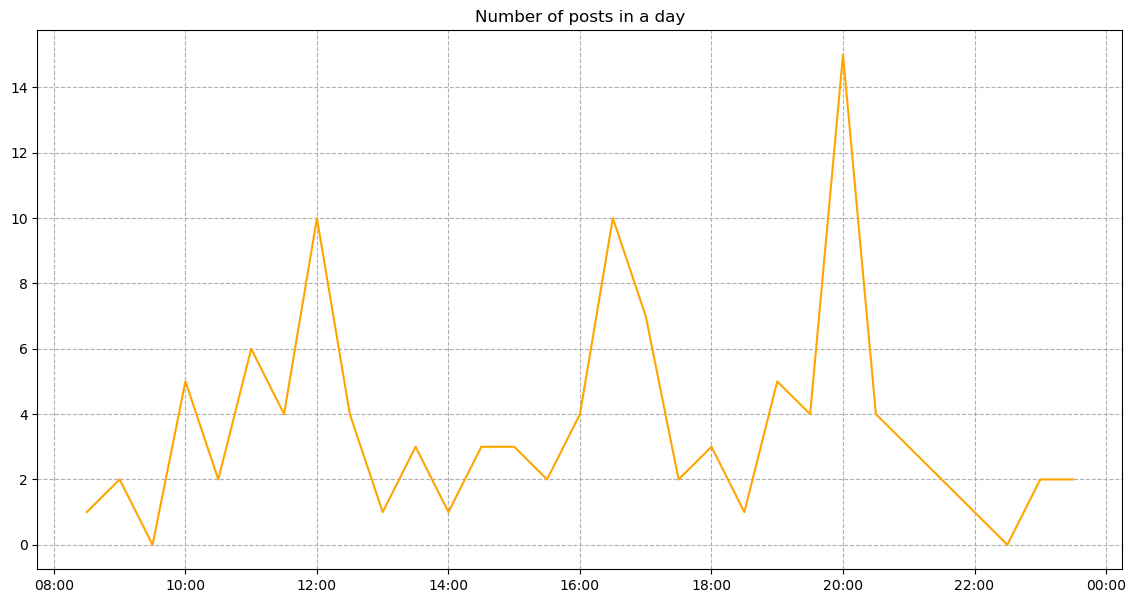

In [ ]:
min_time = df_times.index.min()
max_time = df_times.index.max()

plt.figure(figsize = (14, 7))

plt.title("Number of posts in a day")

plt.grid("dark", linestyle="--")

plt.plot(df_times.index, df_times["reaction_count"], color="orange")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

plt.show()

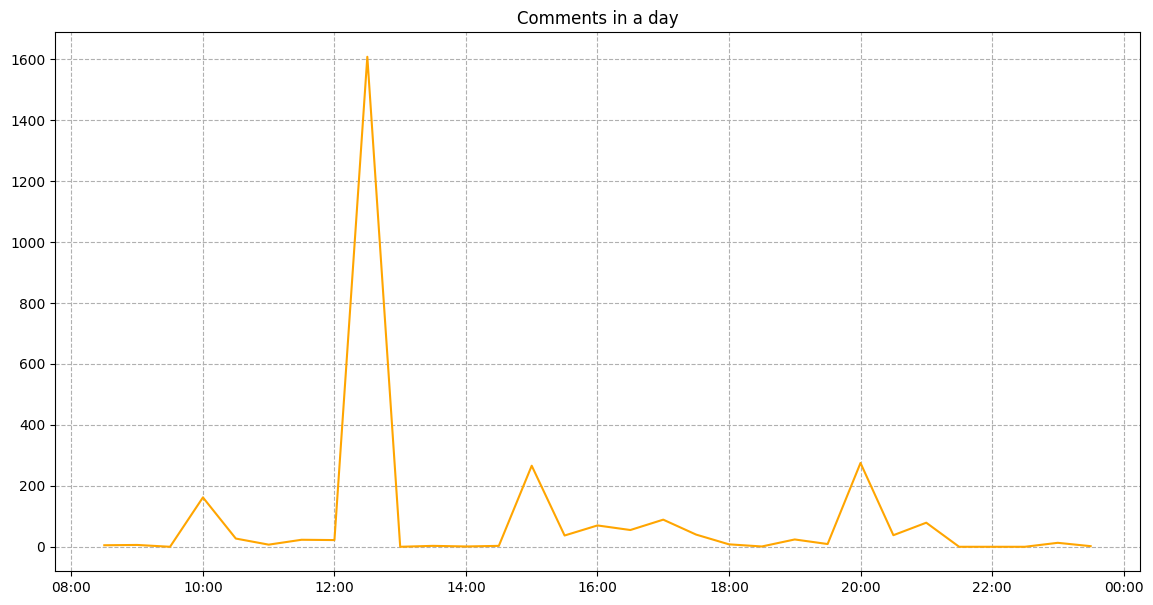

In [74]:
#phân bố lượt cmt theo thời gian
min_time = df_times.index.min()
max_time = df_times.index.max()

plt.figure(figsize = (14, 7))

plt.title("Comments in a day")

plt.grid("dark", linestyle="--")

plt.plot(df_times.index, df_times["comments"], color="orange")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

plt.show()

In [ ]:
#tổng hợp lượng reactions
reactions_df = df.loc[:, ["reaction_count", "thích", "thương thương" ,"yêu thích", "haha", "buồn", "wow", "phẫn nộ"]].agg(np.sum).reset_index()
reactions_df

,index,0
0,reaction_count,27021
1,thích,19589
2,thương thương,225
3,yêu thích,6833
4,haha,236
5,buồn,10
6,wow,125
7,phẫn nộ,3


<BarContainer object of 8 artists>

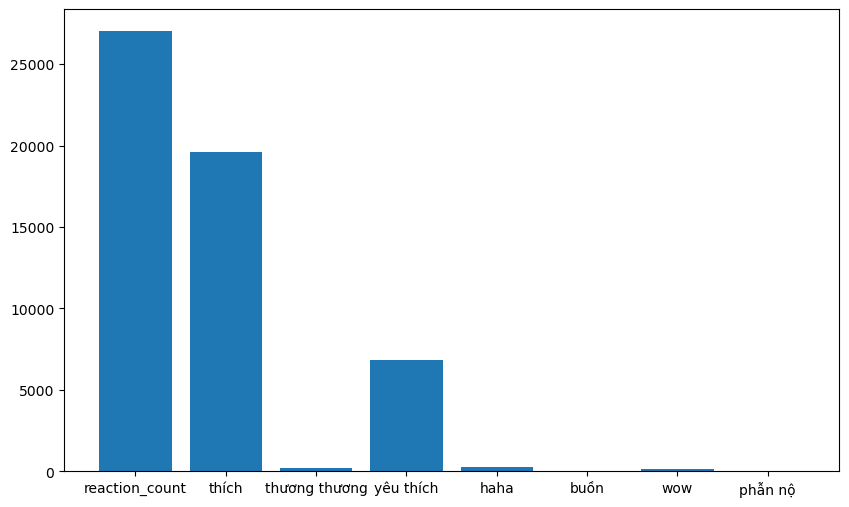

In [ ]:
#bieu do cot so luong tuong tac cua fanpage
plt.figure(figsize = (10,6))
plt.bar(reactions_df['index'], reactions_df[0])

In [ ]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud

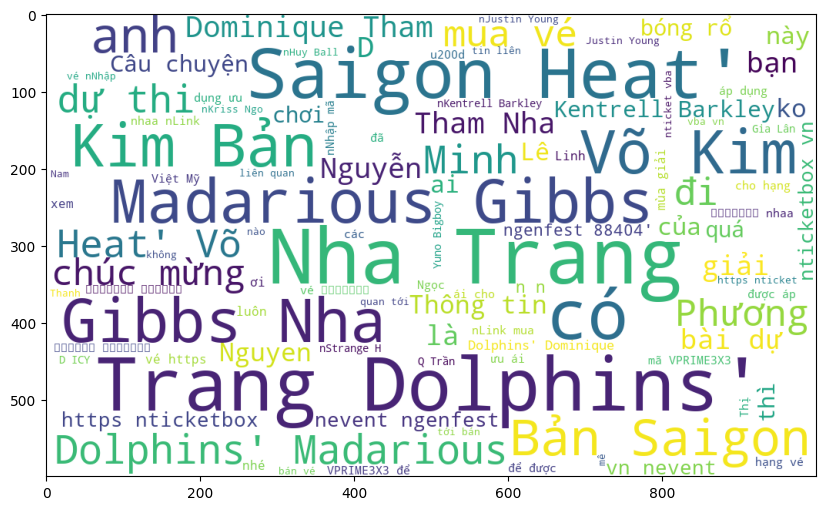

In [ ]:
#các từ khóa thông dụng nhất thu thập được từ cmt người dùng
text = df_cmt['comments_text'].str.cat(sep = ' ')

wordcloud_like = WordCloud(background_color="white", max_words= 100 , max_font_size=100, relative_scaling=.5, width=1000, height=600).generate(text)


plt.figure(figsize = (10,6))
plt.imshow(wordcloud_like)

plt.show()



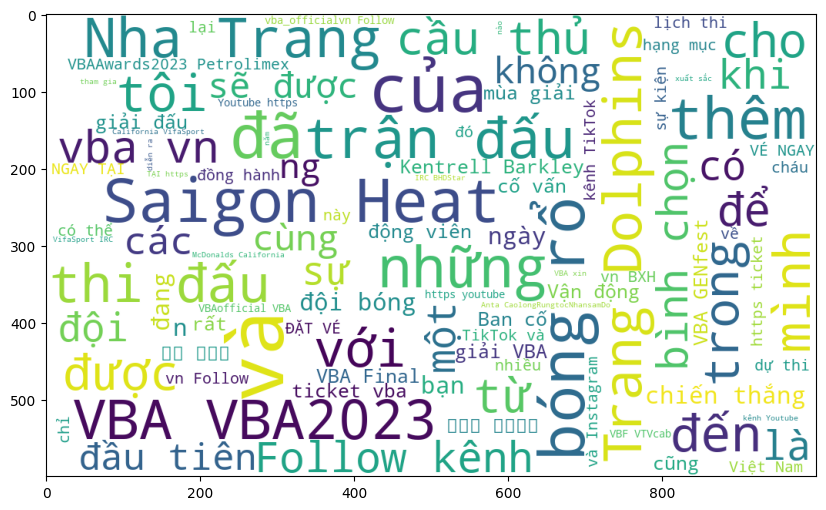

In [ ]:
text = df_cmt['post_text'].str.cat(sep = ' ')

wordcloud_like = WordCloud(background_color="white", max_words= 100 , max_font_size=100, relative_scaling=.5, width=1000, height=600).generate(text)


plt.figure(figsize = (10,6))
plt.imshow(wordcloud_like)

plt.show()


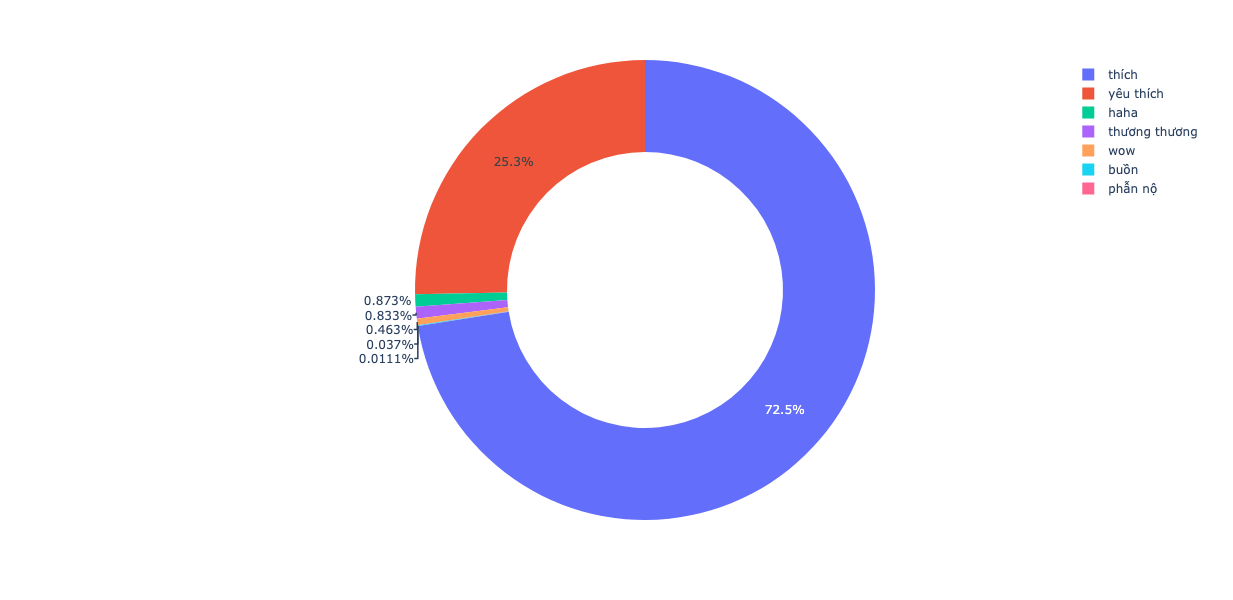

In [ ]:
fig = px.pie(names = reactions_df.values[1:, 0], 
             values =reactions_df.values[1: , 1], 
             hole = 0.6, width = 1000, height = 600, )

fig.show()

In [ ]:
maxCmt = df.loc[df["comments"].idxmax()]
maxCmt

post_id                                             621381610206885
post_text         𝐕𝐁𝐀 𝐀𝐖𝐀𝐑𝐃𝐒 𝟐𝟎𝟐𝟑 - MOMENT OF GLORY l Khoảnh khắ...
time                                            2023-10-03 12:30:04
comments                                                       1578
shares                                                           30
reactions         {'thích': 1067, 'yêu thích': 460, 'haha': 4, '...
reaction_count                                                 1542
thích                                                          1067
thương thương                                                    10
yêu thích                                                       460
haha                                                              4
buồn                                                              0
wow                                                               1
phẫn nộ                                                           0
Name: 91, dtype: object